# <span style="color:orange;">₿</span> Bitcoin Exchange Rate Analysis with forex_python


## Importing Libraries

In [243]:
from forex_python.bitcoin import BtcConverter
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

## Creating a Bitcoin Converter Instance

In [244]:
b=BtcConverter()

## Defining Date Range for Bitcoin Data Analysis (2017-01-01 to 2022-01-01)

In [245]:
start=datetime(2017,1,1)
end=datetime(2022,1,1)

## Fetching Bitcoin Price Data in USD for the Specified Date Range

In [246]:
price_data=b.get_previous_price_list("USD",start,end)

In [247]:
len(price_data)

1827

In [248]:
type(price_data)

dict

## Creating a DataFrame from Bitcoin Price Data

In [249]:
prices=pd.DataFrame(price_data.items(),columns=["date","price"])

In [250]:
prices.head()

,date,price
0,2017-01-01,997.6888
1,2017-01-02,1018.0500
2,2017-01-03,1030.8175
3,2017-01-04,1129.8700
4,2017-01-05,1005.8150


In [251]:
prices.tail()

,date,price
1822,2021-12-28,47549.8233
1823,2021-12-29,46470.6900
1824,2021-12-30,47138.0417
1825,2021-12-31,46206.1767
1826,2022-01-01,47742.9950


## Setting Date as the Index in Bitcoin Price DataFrame

In [252]:
prices=prices.set_index('date')

In [253]:
prices.head()

,price
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


## Selecting Bitcoin Price Data for the Year 2017

In [254]:
prices.loc["2017-01-01":"2017-12-31"]

,price
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2017-12-27,15378.2850
2017-12-28,14428.7600
2017-12-29,14427.8700


## Visualizing Bitcoin Price Trends

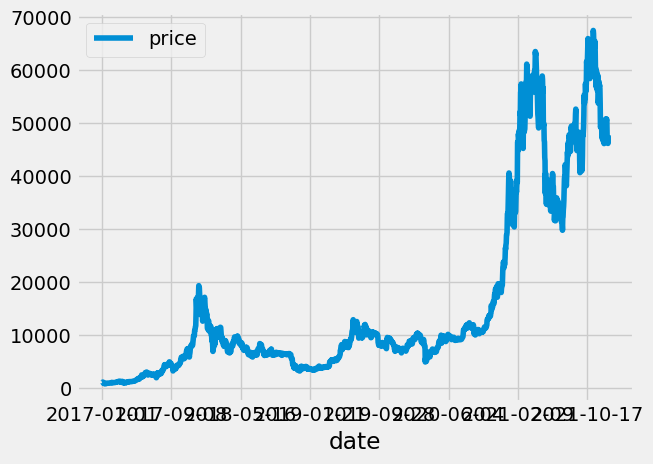

In [255]:
prices.plot()
plt.show()

## Calculating 30-Day Rolling Mean of Bitcoin Prices

In [256]:
prices.rolling(30).mean()

,price
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
...,...
2021-12-28,50128.234560
2021-12-29,49749.440727
2021-12-30,49421.574283


## Plotting 30-Day Rolling Mean of Bitcoin Prices

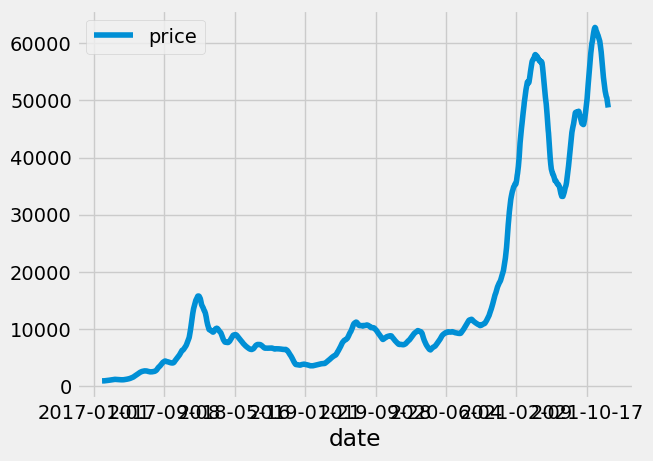

In [257]:
prices.rolling(30).mean().plot()
plt.show()

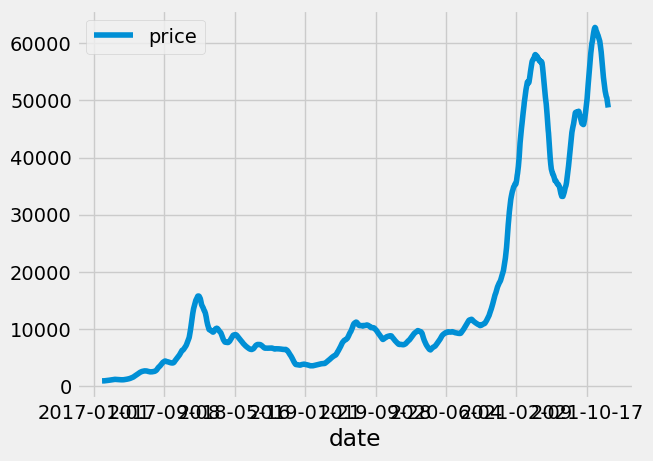

In [258]:
style.use('fivethirtyeight')
rolling=prices.rolling(30).mean()
rolling.plot()
plt.show()

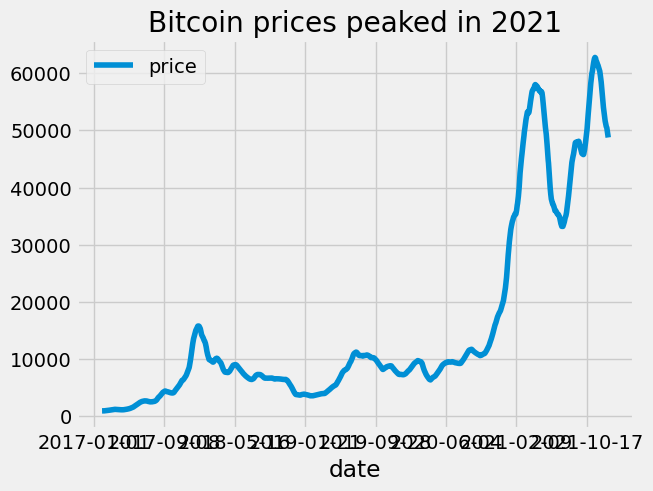

In [259]:
ax=rolling.plot()
plt.title('Bitcoin prices peaked in 2021')
plt.show()

## Plotting Bitcoin Price Trends with Highlighted Peak in 2021

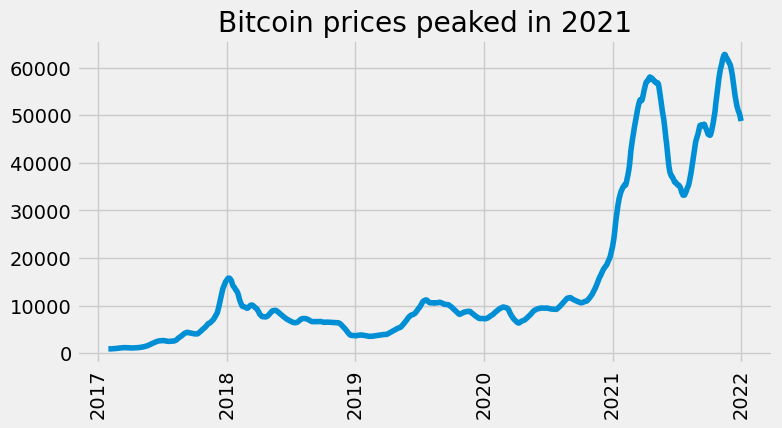

In [260]:
fig,ax=plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values,rolling['price'],linewidth=4)

ticks=['2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01']
tick_labels=["2017","2018","2019","2020","2021","2022"]

plt.title('Bitcoin prices peaked in 2021')
plt.xticks(ticks,rotation="vertical")
ax.set_xticklabels(tick_labels)

plt.show()

## Bitcoin Price Analysis: Pre-2021 vs. Peak in 2021 vs. 2018-2019 Periods

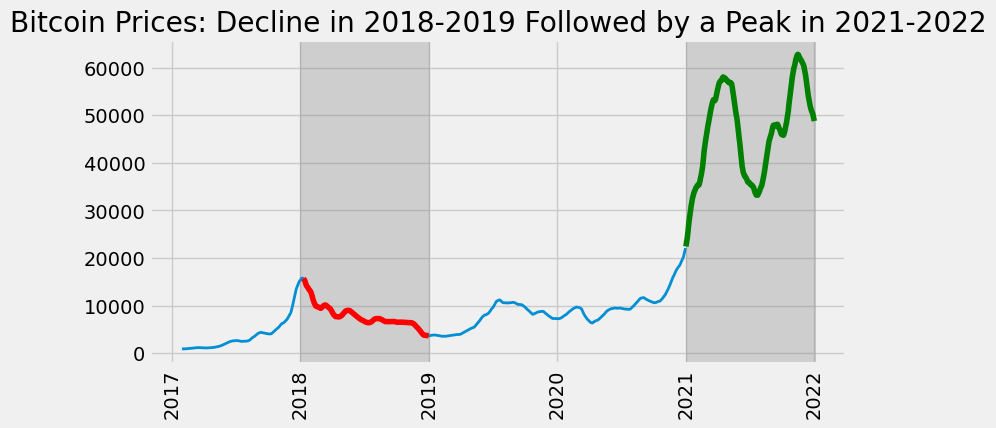

In [269]:
pre_2021=rolling.loc[:"2020-12-31"]
post_2021=rolling.loc["2021-01-01":]

pre_2018=rolling.loc[:"2018-01-10"]
pre_2020=rolling.loc[:"2019-01-01"]

between2018_2019=rolling.loc["2018-01-10":"2019-01-01"]

fig,ax=plt.subplots(figsize=(8,4))

ax.plot(pre_2021.index.values,pre_2021['price'],linewidth=2)
ax.plot(post_2021.index.values,post_2021['price'],linewidth=4,color="green")
ax.plot(between2018_2019.index.values,between2018_2019['price'],linewidth=4,color="red")

ax.axvspan(xmin=365,xmax=731,ymin=0,alpha=0.3,color="grey")
ax.axvspan(xmin=1461,xmax=1461+366,ymin=0,alpha=0.3,color="grey")

ticks=['2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01']
tick_labels=["2017","2018","2019","2020","2021","2022"]

plt.title('Bitcoin Prices: Decline in 2018-2019 Followed by a Peak in 2021-2022')
plt.xticks(ticks,rotation="vertical")
ax.set_xticklabels(tick_labels)

plt.show()

In [262]:
pre_2018.shape

(375, 1)

In [264]:
pre_2020.shape

(731, 1)

In [265]:
pre_2021.shape

(1461, 1)

In [267]:
post_2021.shape

(366, 1)